In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### About the Dataset

We have used the Walmart Dataset for the Time Series Analysis.
The Walmart Sales Forecasting dataset is a collection of historical sales data for 45 Walmart stores located in different regions across the United States.Each store has around 99 departments and weekly Sales of all the departments have been provided.The dataset covers sales from 2010 to 2012 (3 years) and includes information on weekly sales, holidays, markdown events, and store and department information.

Features used in Dataset:
1) Store - Specifies the store number of each store

2) Dept - Specifies the department number within each store.Each Store has more than 80 departments.

3) Date - Gives an idea about the Date in terms of weekly interval basis.

4) Weekly_sales - Contains the sales made by each department for that store for each week.

5) Is_Holiday - Specifies whether the week is a special holiday week. It's a boolean value

6) Tempreature - Specifies the average tempreature in the region.It's in degree Fahrenheit.

7) Fuel_Price - Specifies the cost of the fuel in the region.It is represented in $/gallon

8) MarkDown - It includes information on markdown events that Walmart ran during the period covered by the data. Markdowns are often used to clear out inventory or to promote specific products.It indicates the discounts offered on specific products, so that retailers can attract more customers and boost sales.

9) CPI - It is the Consumer Price Index.It is a measure of the average change in prices of goods and services that a typical consumer purchases.

10) Unemployment - It is the unemployment rate in the region of the store during that week. It is a measure of the proportion of the labor force that is unemployed and actively seeking employment. It is typically expressed as a percentage.

11) Type - The Stores are classified into three types of categories(A,B,C) according to certain factors.

12) Size - Sizes of each stores have been provided.

### Part 1: Merging,Cleaning and Pre-processing the dataset

We have cleaned the data by replacing the null values wherever required. As there are three files in the dataset we have merged those three files to gain valuable insights. In addtion to that we have renamed certain columns as well as changed the data types of certain features. Also, we have created few new features wherever required.

In [2]:
# Importing the dataset
features_df = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")
train_df=pd.read_csv("train.csv")

In [3]:
# Checking for duplicate and null values
stores_df.duplicated().sum()
features_df.duplicated().sum()

0

In [4]:
# Checking for null values
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [5]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [6]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

The dataset has around 45 Stores and each Store of the Walmart has approximately 99 departments. All the deparment wise weekly sales of the stores for three years (2010,2011,2012) have been provided. 

In [7]:
# Overviewing the train dataset which has weekly sales values
train_df.loc[(train_df['Store']==3) & (train_df['Dept']==1)]

Store  Dept        Date  Weekly_Sales  IsHoliday
20482      3     1  2010-02-05       6453.58      False
20483      3     1  2010-02-12      12748.72       True
20484      3     1  2010-02-19       8918.31      False
20485      3     1  2010-02-26       4992.00      False
20486      3     1  2010-03-05       5172.73      False
...      ...   ...         ...           ...        ...
20620      3     1  2012-09-28       8762.39      False
20621      3     1  2012-10-05       9750.12      False
20622      3     1  2012-10-12      11038.58      False
20623      3     1  2012-10-19      10886.48      False
20624      3     1  2012-10-26      11351.24      False

[143 rows x 5 columns]

In [8]:
# Merging the train_df, features_df and store_df dataset on common column values to gain further insights.
merged_df = train_df.merge(features_df,on=['Store','Date'],how='inner').merge(stores_df,on=['Store'],how='inner')

In [9]:
merged_df.shape
merged_df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     2  2010-02-05      50605.27        False        42.31   
2      1     3  2010-02-05      13740.12        False        42.31   
3      1     4  2010-02-05      39954.04        False        42.31   
4      1     5  2010-02-05      32229.38        False        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.572        NaN        NaN        NaN        NaN        NaN   
2       2.572        NaN        NaN        NaN        NaN        NaN   
3       2.572        NaN        NaN        NaN        NaN        NaN   
4       2.572        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  IsHoliday_y Type    Size  
0  211.096358         8.106        False    A  151315  
1  211.096358         8.106        False    A  151315  
2  211.096358         8.106        False    A  151315  
3  211.096358         8.106        False    A  151315  
4  211.096358         8.106        False    A  151315

In [10]:
# After merging there are two features with same name hence,deleting the duplicate columns
merged_df.drop(['IsHoliday_y'],axis=1,inplace=True)

In [11]:
# Renaming the column
merged_df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [12]:
merged_df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     2  2010-02-05      50605.27      False        42.31       2.572   
2      1     3  2010-02-05      13740.12      False        42.31       2.572   
3      1     4  2010-02-05      39954.04      False        42.31       2.572   
4      1     5  2010-02-05      32229.38      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   
2        NaN        NaN        NaN        NaN        NaN  211.096358   
3        NaN        NaN        NaN        NaN        NaN  211.096358   
4        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

In [13]:
merged_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [14]:
# Analysing the number of unique stores walmart has
merged_df['Store'].nunique()

45

In [15]:
# Analysing the number of unique departments walmart has
merged_df['Dept'].nunique()

81

In [16]:
# Analysing the weekly sales value
# We can see that some weekly sales are in negative, hence we will not consider the values as the 
# store may have some discrepancy for those sales value.
merged_df.loc[merged_df['Weekly_Sales'] < 0]

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
188         1    47  2010-02-19       -863.00      False        39.93   
406         1    47  2010-03-12       -698.00      False        57.79   
2549        1    47  2010-10-08        -58.00      False        63.93   
3632        1    54  2011-01-21        -50.00      False        44.04   
4419        1    47  2011-04-08       -298.00      False        67.84   
...       ...   ...         ...           ...        ...          ...   
419999     45    49  2012-05-18         -3.97      False        66.30   
420066     45    49  2012-05-25         -4.97      False        67.21   
420403     45    49  2012-06-29        -34.00      False        75.22   
420736     45    49  2012-08-03         -1.91      False        76.58   
421142     45    49  2012-09-14         -6.83      False        67.87   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
188          2.514        NaN        NaN        NaN        NaN        NaN   
406          2.667        NaN        NaN        NaN        NaN        NaN   
2549         2.633        NaN        NaN        NaN        NaN        NaN   
3632         3.016        NaN        NaN        NaN        NaN        NaN   
4419         3.622        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
419999       3.848    6813.74        NaN      13.86     936.49    2941.55   
420066       3.798    5370.39        NaN     361.22    1287.62    2461.81   
420403       3.506    3291.36     425.60        NaN     314.88    2255.34   
420736       3.654   24853.05      39.56      17.96   11142.69    2768.32   
421142       3.948   11407.95        NaN       4.30    3421.72    5268.92   

               CPI  Unemployment Type    Size  
188     211.289143         8.106    A  151315  
406     211.380643         8.106    A  151315  
2549    211.746754         7.838    A  151315  
3632    211.827234         7.742    A  151315  
4419    215.074394         7.682    A  151315  
...            ...           ...  ...     ...  
419999  190.996448         8.567    B  118221  
420066  191.002810         8.567    B  118221  
420403  191.099246         8.567    B  118221  
420736  191.164090         8.684    B  118221  
421142  191.699850         8.684    B  118221  

[1285 rows x 16 columns]

In [17]:
# Hence we consider only appropriate sales value for analysis.
merged_df=merged_df.loc[merged_df['Weekly_Sales'] > 0]

In [18]:
# Analysing the Holiday feature.
is_holiday=merged_df.loc[merged_df['IsHoliday']==True]

In [19]:
is_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [20]:
not_holiday=merged_df.loc[merged_df['IsHoliday']==False]

In [21]:
# Creating new features/columns based on the dates as per special holidays
# Creating new feature for Super Bowling Holiday
merged_df.loc[(merged_df['Date']=='2012-02-12') | (merged_df['Date']=='2011-02-11') | (merged_df['Date']=='2012-02-10'),'Super_Bowl']= True
merged_df.loc[(merged_df['Date']!='2010-02-12') & (merged_df['Date']!='2011-02-11') & (merged_df['Date']!='2012-02-10'), 'Super_Bowl'] = False

In [22]:
# Creating new feature for Labor Holiday
merged_df.loc[(merged_df['Date']=='2010-09-10') | (merged_df['Date']=='2011-09-09') | (merged_df['Date']=='2012-09-07'), 'Labor_Day'] = True
merged_df.loc[(merged_df['Date']!='2010-09-10') & (merged_df['Date']!='2011-09-09') & (merged_df['Date']!='2012-09-07'), 'Labor_Day'] = False

In [23]:
# Creating new column for Thanksgiving Holiday
merged_df.loc[(merged_df['Date']=='2010-11-26') | (merged_df['Date']=='2011-11-25') | (merged_df['Date']=='2012-11-22'), 'Thanksgiving'] = True
merged_df.loc[(merged_df['Date']!='2010-11-26') & (merged_df['Date']!='2011-11-25') | (merged_df['Date']!='2012-11-22'), 'Thanksgiving'] = False

In [24]:
# Creating new feature for Christmas Holiday
merged_df.loc[(merged_df['Date']=='2010-12-31') | (merged_df['Date']=='2011-02-11') | (merged_df['Date']=='2010-02-10'), 'Christmas'] = True
merged_df.loc[(merged_df['Date']!='2010-12-31') & (merged_df['Date']!='2011-02-11') & (merged_df['Date']!='2010-02-10'), 'Christmas'] = False

In [25]:
merged_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Super_Bowl',
       'Labor_Day', 'Thanksgiving', 'Christmas'],
      dtype='object')

In [26]:
# As we have multiple values null values in MarkDown features .
merged_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
Super_Bowl        2949
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

The Markdown feature indicates the percentage of the original price that a product was discounted during a markdown event.From the above dataframe we can see that walmart had offered 5 Markdown events.A value of 0 for the Markdown feature indicates that no markdown event occurred for that product during that week.Hence we can simply fill out the values with zero.

In [27]:
# Filling all the null values with 0
merged_df=merged_df.fillna(0)

In [28]:
merged_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

In [29]:
# Handaling the Date Column
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [30]:
merged_df.set_index('Date',inplace=True)

In [31]:
merged_df['Day'] = merged_df.index.day
merged_df['Week'] = np.ceil(merged_df.index.dayofyear/7).astype(int)
merged_df['Month'] = merged_df.index.month
merged_df['Quater'] = merged_df.index.quarter
merged_df['Year'] = merged_df.index.year

In [32]:
merged_df['Super_Bowl']=merged_df['Super_Bowl'].astype(bool)

In [33]:
merged_df.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
Super_Bowl         bool
Labor_Day          bool
Thanksgiving       bool
Christmas          bool
Day               int32
Week              int32
Month             int32
Quater            int32
Year              int32
dtype: object

In [34]:
# Lets have a look on the numeric variables the dataframe has.
merged_df.describe()

Store           Dept   Weekly_Sales    Temperature  \
count  420212.000000  420212.000000  420212.000000  420212.000000   
mean       22.195611      44.241309   16033.114591      60.090599   
std        12.787236      30.508819   22729.492116      18.447857   
min         1.000000       1.000000       0.010000      -2.060000   
25%        11.000000      18.000000    2120.130000      46.680000   
50%        22.000000      37.000000    7661.700000      62.090000   
75%        33.000000      74.000000   20271.265000      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  420212.000000  420212.000000  420212.000000  420212.000000   
mean        3.360890    2590.323565     878.905242     468.845949   
std         0.458519    6053.415601    5076.928566    5534.069859   
min         2.472000       0.000000    -265.760000     -29.100000   
25%         2.933000       0.000000       0.000000       0.000000   
50%         3.452000       0.000000       0.000000       0.000000   
75%         3.738000    2809.050000       2.400000       4.540000   
max         4.468000   88646.760000  104519.540000  141630.610000   

           MarkDown4      MarkDown5            CPI   Unemployment  \
count  420212.000000  420212.000000  420212.000000  420212.000000   
mean     1083.534361    1662.805002     171.212496       7.960000   
std      3896.068938    4206.209357      39.162445       1.863879   
min         0.000000       0.000000     126.064000       3.879000   
25%         0.000000       0.000000     132.022667       6.891000   
50%         0.000000       0.000000     182.350989       7.866000   
75%       425.290000    2168.040000     212.445487       8.567000   
max     67474.850000  108519.280000     227.232807      14.313000   

                Size            Day           Week          Month  \
count  420212.000000  420212.000000  420212.000000  420212.000000   
mean   136749.732787      15.673903      26.162201       6.449866   
std     60993.084568       8.752818      14.222884       3.243397   
min     34875.000000       1.000000       1.000000       1.000000   
25%     93638.000000       8.000000      14.000000       4.000000   
50%    140167.000000      16.000000      26.000000       6.000000   
75%    202505.000000      23.000000      38.000000       9.000000   
max    219622.000000      31.000000      53.000000      12.000000   

              Quater           Year  
count  420212.000000  420212.000000  
mean        2.482968    2010.968454  
std         1.071469       0.796898  
min         1.000000    2010.000000  
25%         2.000000    2010.000000  
50%         2.000000    2011.000000  
75%         3.000000    2012.000000  
max         4.000000    2012.000000

### Part 2: Exploratory Data Analysis

Observation - Here we have analysed the Holiday feature based on the weekly sales. As we can see that more sales are done during the holidays than the other working days.

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

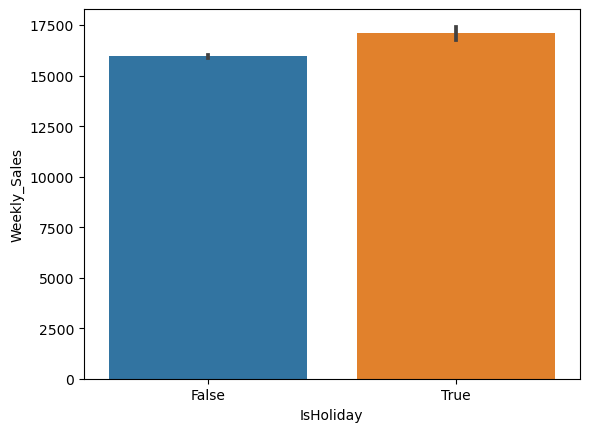

In [35]:
# Analysing the Holiday column
sns.barplot(x='IsHoliday',y='Weekly_Sales',data=merged_df)

Observation - Here we can make a rough assumption that walmart store has categorised the stores into three types according to the Sizes.Where Stores under type A cateegory has the highest size of around (175000) followed by stores under type B (100000) and C(40000)

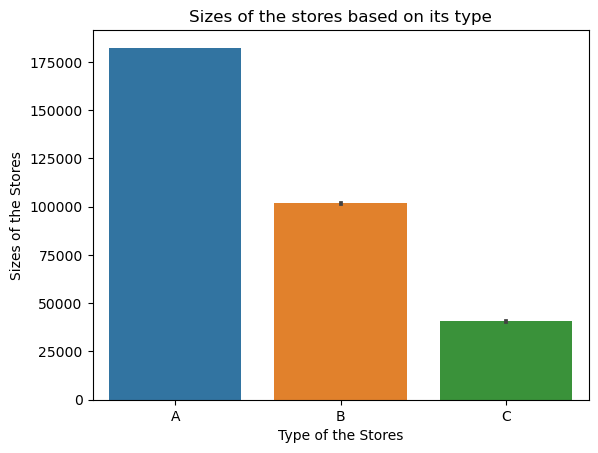

In [36]:
sns.barplot(x='Type',y='Size',data=merged_df)
# Adding labels to the x-axis and y-axis
plt.xlabel('Type of the Stores')
plt.ylabel('Sizes of the Stores')

# Add a title to the chart
plt.title('Sizes of the stores based on its type')

# Show the chart
plt.show()

Let's now analyse the weekly sales made by all the Departments, so that we can figure out which departments generally makes higher sales in all the stores.

Observations- From the below first scatter plot graph, we can see that one department between 60-80(let's assume it is 72), has 
higher sales values. 
But, when we take the averages(as plotted in the second bar graph shown below), we can see that department 92 has higher mean sales. 
Here we can make an assumtion that department 72 is seasonal department, as it has higher values in some seasons but on average 92 is higher.

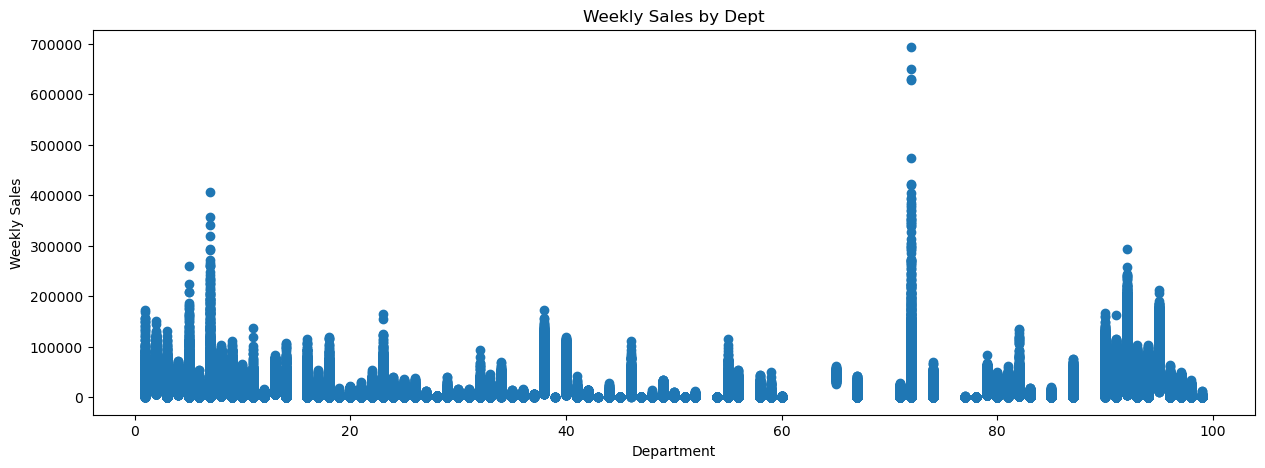

In [37]:
x = merged_df['Dept']
y = merged_df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Dept')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.scatter(x, y)
plt.show()

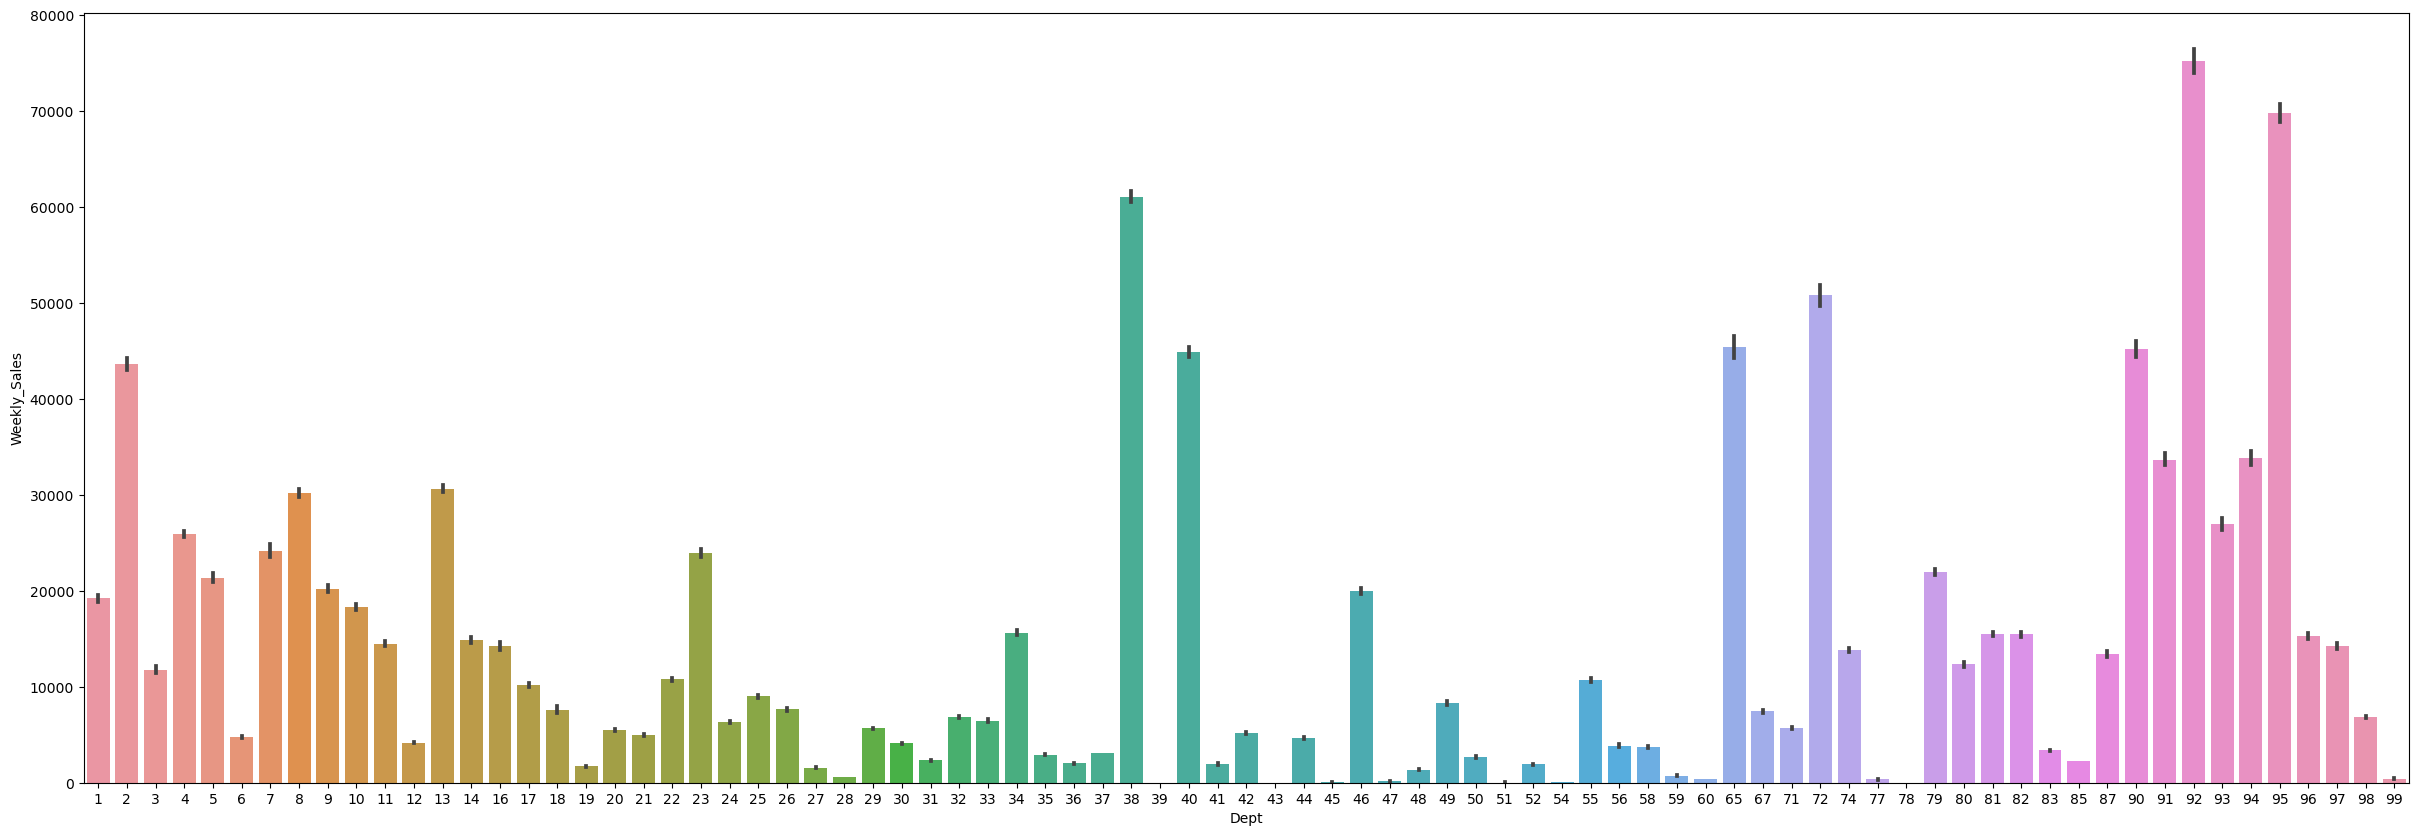

In [38]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=merged_df)

Similary we can analyse the weekly sales made by the overall stores.

Observation - As we observe similar pattern is followed if we plot the scatter plot for all stores based on weekly sales.From the first graph we observe that, some stores have higher sales but if we have a look on the bar graphs, on average store 20 made the highest sales followed by store 4 and 14.

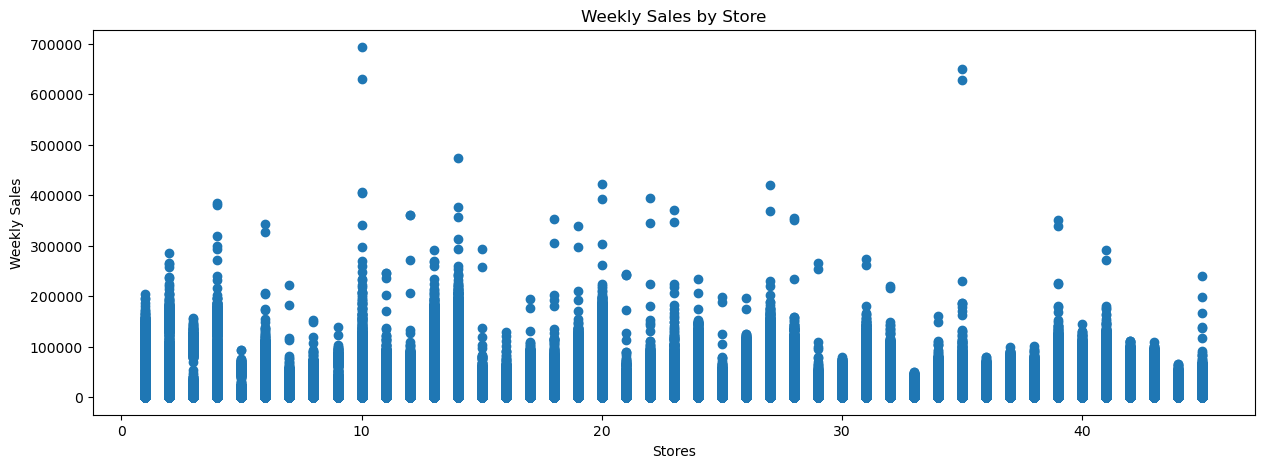

In [39]:
x = merged_df['Store']
y = merged_df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

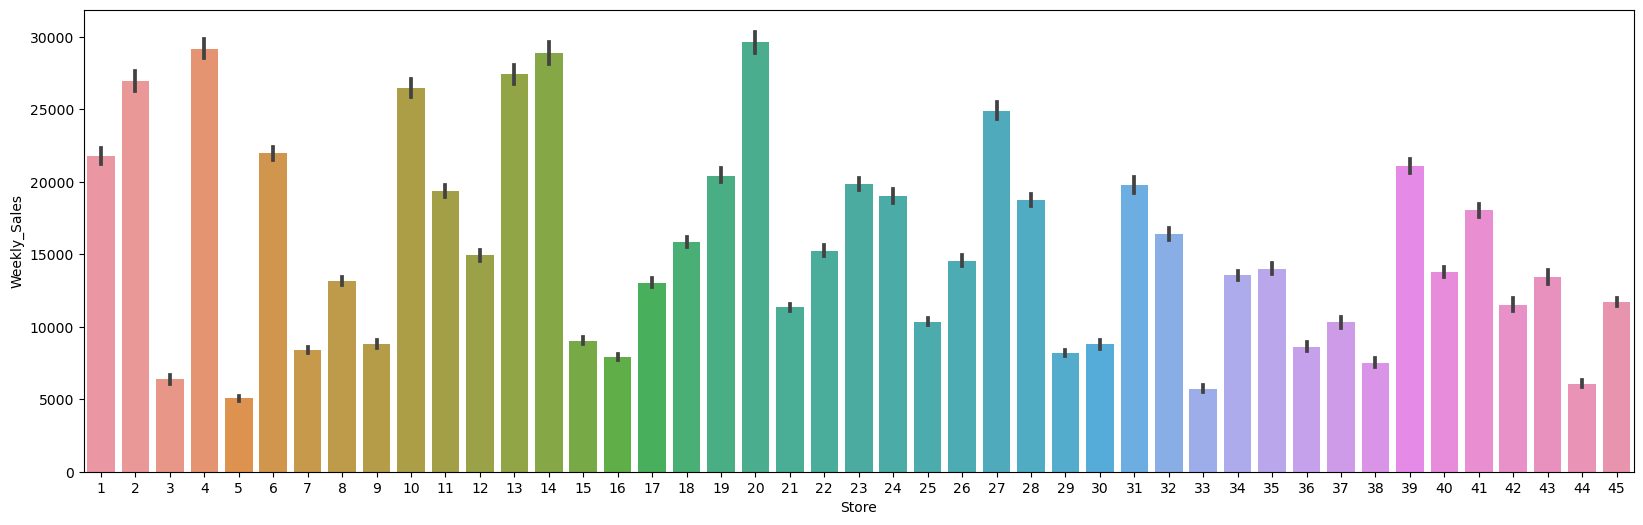

In [40]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=merged_df)

Let's now find the Top 10 Stores according to weekly sales.

Observation - As we can see that Stores 20, 4, 14, 13, 2, 10, 27, 6, 1, 39 are the top 10 stores having highest weekly sales.

In [41]:
grouped_df = merged_df.groupby(['Store'])
avg_weekly_sales= grouped_df['Weekly_Sales'].mean()
top_10_stores = avg_weekly_sales.sort_values(ascending=False).head(10)
top_10_stores_df = top_10_stores.to_frame()
top_10_stores_df

Weekly_Sales
Store              
20     29627.580994
4      29175.540012
14     28885.743572
13     27399.631860
2      26961.734433
10     26474.084736
27     24897.723614
6      21960.799719
1      21749.145978
39     21084.103489

Here we have analysed the Weekly sales made for 2010,2011 and 2012 from the above obtained top 10 stores.

In [42]:
selected_stores=[20, 4, 14, 13, 2, 10, 27, 6, 1, 39]
grouped_df=merged_df[merged_df['Store'].isin(selected_stores)]
grouped_df = grouped_df.groupby(['Store', 'Year'])

# Calculate average weekly sales
avg_weekly_sales = grouped_df['Weekly_Sales'].mean()

# Sort by average weekly sales
avg_weekly_sales = avg_weekly_sales.sort_values(ascending=False)

# Unstack to show sales for each store and year
avg_weekly_sales_unstacked = avg_weekly_sales.unstack()
(avg_weekly_sales_unstacked)

Year           2010          2011          2012
Store                                          
1      21302.456686  21771.179938  22223.147586
2      27884.720612  26486.239839  26511.644193
4      27717.661880  29839.463962  30003.743907
6      22614.870047  21647.798718  21615.255567
10     27147.831210  26548.372067  25615.724447
13     27050.775937  27495.410155  27675.572327
14     31341.143025  29227.869325  25728.156980
20     29877.936675  29574.242030  29413.317672
27     26412.488812  24717.162364  23434.441600
39     19879.916017  21190.725738  22303.932596

We have further tried to analyse the numeric columns like Fuel_Price of the region, Tempreature of the region, Consumer Price Index and the Unemployment value.

C:\Users\RIDDHI\AppData\Local\Temp\ipykernel_7260\1703925749.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = merged_df.Fuel_Price)


Text(0.5, 1.0, 'Fuel Price Distribution')

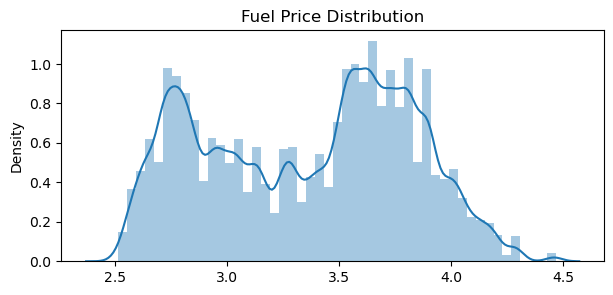

In [43]:
# Here we can see that the fuel prices vary from 2.5 to 4.5 $/gallon. There are very less stores which has prices around 2.5 
# and 4.5 in certain regions.However many stores have price range between 3.5 and 4.0 $/gallon.

plt.figure(figsize=[7, 3])
sns.distplot(x = merged_df.Fuel_Price)
plt.title('Fuel Price Distribution')

<Axes: xlabel='Fuel_Price'>

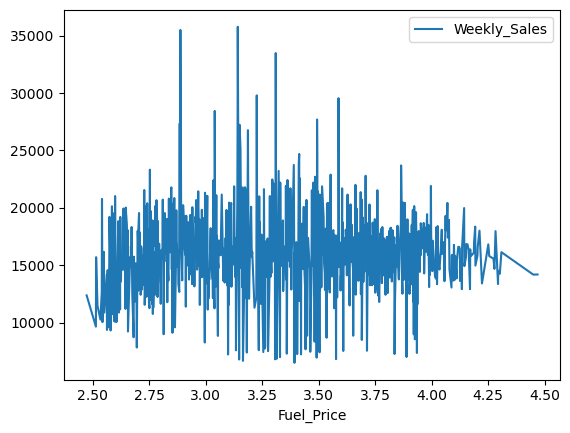

In [44]:
# Here we have tried to analyse the relationship between weekly sales and fuel_price.
# The graph shows a negative correlation between fuel price and weekly sales, meaning that as the fuel price increases, 
# weekly sales tend to decrease. 
# This is likely because consumers have less disposable income to spend on other goods and services when they are paying more 
# for fuel.

feul_price=pd.pivot_table(merged_df,values='Weekly_Sales',index='Fuel_Price')
feul_price.plot()

<Axes: xlabel='Temperature'>

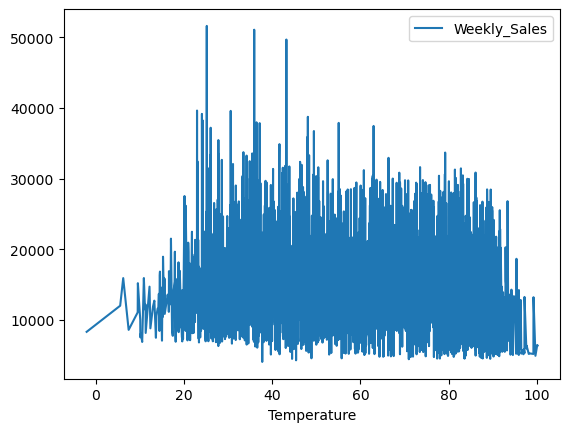

In [45]:
# Here we have analysed the relation between weekly sales and tempreature.
# The graph shows a positive correlation between temperature and weekly sales, meaning that as the temperature increases, 
# weekly sales increase. 
# This is likely because consumers are more likely to go out and spend money on goods and services when the weather is nice.

temp = pd.pivot_table(merged_df, values='Weekly_Sales', index='Temperature')
temp.plot()

C:\Users\RIDDHI\AppData\Local\Temp\ipykernel_7260\1218239473.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = merged_df.CPI)


Text(0.5, 1.0, 'CPI Value Distribution')

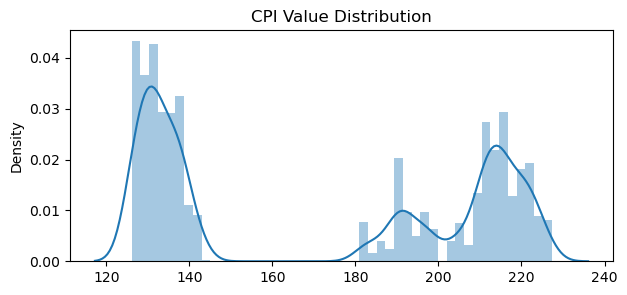

In [46]:
# The below graph shows a normal distribution of CPI values, with the majority of CPI values falling between 120 and 140 
# followed by 180 and 220.
# The graph also shows a slight left skew, meaning that there are more stores with CPI values below the average CPI value than 
# there are stores with CPI values above the average CPI value. 
# This may be due to the fact that some stores are located in areas with lower prices than others.
# In addition, we can observe there are no CPI values between 145 to 175.

plt.figure(figsize=[7, 3])
sns.distplot(x = merged_df.CPI)
plt.title('CPI Value Distribution')

<Axes: xlabel='CPI'>

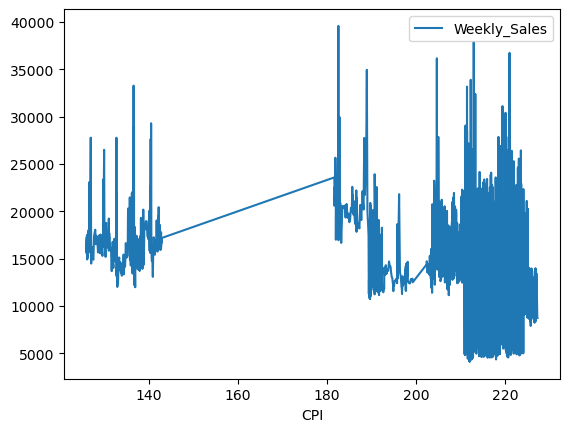

In [47]:
# Here we have tried to analyse the relationship between weekly sales and CPI values.
# The graph also shows a slight upward trend in weekly sales over time, suggesting that Walmart sales are increasing overall. 
# This could be due to a number of factors, such as population growth, economic growth,or Walmart's expansion into new markets.

cpi = pd.pivot_table(merged_df, values='Weekly_Sales', index='CPI')
cpi.plot()

<Axes: xlabel='Unemployment'>

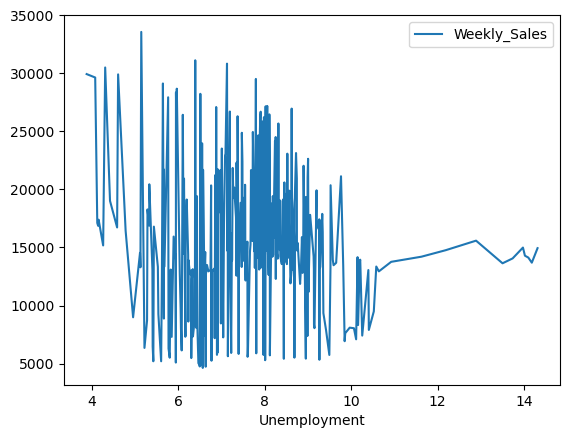

In [48]:
# Here we tried to analyse the relationship between the weekly sales and the unemployment rate.
# The unemployment rate ranges from 4% to 14%.
# The graph shows a negative correlation between unemployment and weekly sales, meaning that as the unemployment rate increases,
# weekly sales tend to decrease. 

unemployment = pd.pivot_table(merged_df,values='Weekly_Sales',index='Unemployment')
unemployment.plot()

<Axes: xlabel='Month', ylabel='Weekly_Sales'>

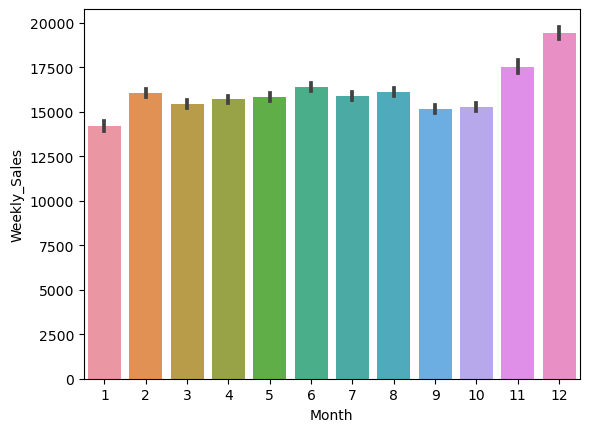

In [49]:
# Observations - When we look at the graph below, the best sales are in December and November, as expected.
# The weekly sales tend to rise specially on the holidays season like Thanksgiving and Christmas.
# However if we take average it is obvious that December has the best value.

sns.barplot(x='Month',y='Weekly_Sales',data=merged_df)

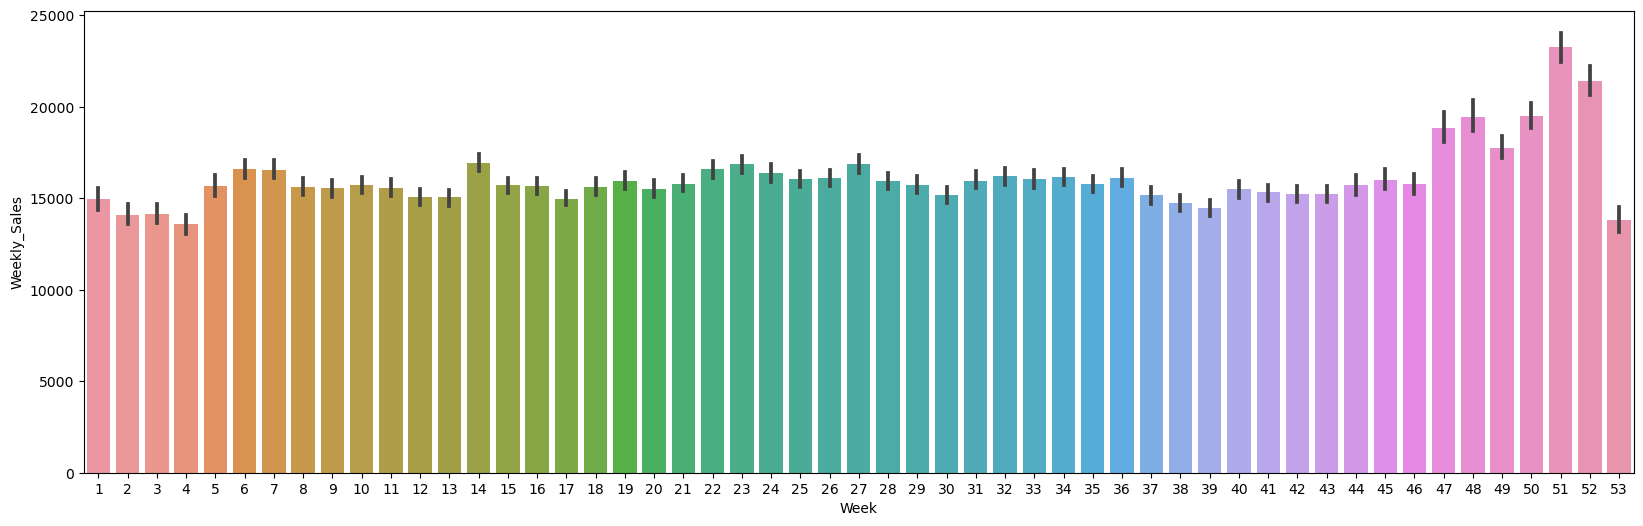

In [50]:
# Observations - We have now tried to analyse the averge weekly sales according to each week overall.
# From graphs, we can see that 51st week and 47th weeks have significantly higher averages due to Christmas, 
# Thankgiving and Black Friday effects.

plt.figure(figsize=(20,6))
fig = sns.barplot(x='Week', y='Weekly_Sales', data=merged_df)

In [51]:
#Observations - We have now tried to find out the top 5 weekly sales average values that belongs to 1-2 weeks before Christmas, 
# Thanksgiving, Black Friday and end of May, when the schools are closed.

merged_df.groupby('Week')['Weekly_Sales'].mean().sort_values(ascending=False).head().to_frame()

Weekly_Sales
Week              
51    23249.219799
52    21387.213594
50    19497.147244
48    19461.457128
47    18846.256780

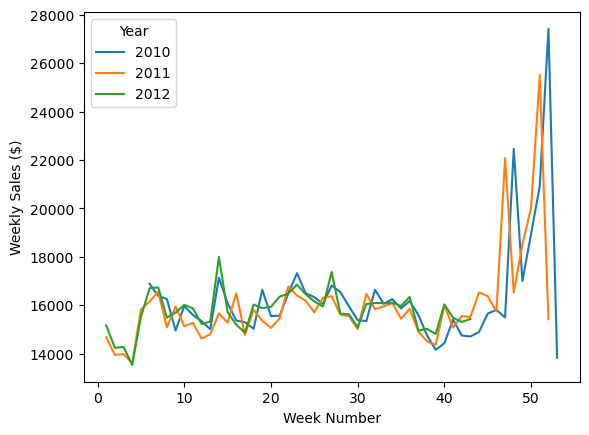

In [52]:
# Here we have tried to analyse the avergae values of weekly sales for 2010,2011,2012.
# The graph shows a seasonal pattern, with sales being higher during the holiday season (November-December) and 
# lower during the summer months (June-August).This is likely due to increased consumer spending during the holidays 
# and decreased consumer spending during the summer months when people are more likely to be on vacation.
# 2010 is the only year in which weekly sales do not decrease in the summer months. In fact, weekly sales increase slightly from Week 26 to Week 28 in 2010.
# However no sales can be observed after week 46 for year 2010.
# 2011 is the year with the highest average weekly sales, at around $32,000.
# 2012 is the year with the lowest average weekly sales, at around $28,000.

weekly_sales = pd.pivot_table(merged_df, values = "Weekly_Sales", columns = "Year", index = "Week")
weekly_sales.plot()
# Adding labels and title
plt.xlabel("Week Number")
plt.ylabel("Weekly Sales ($)")
# Show the graph
plt.show()

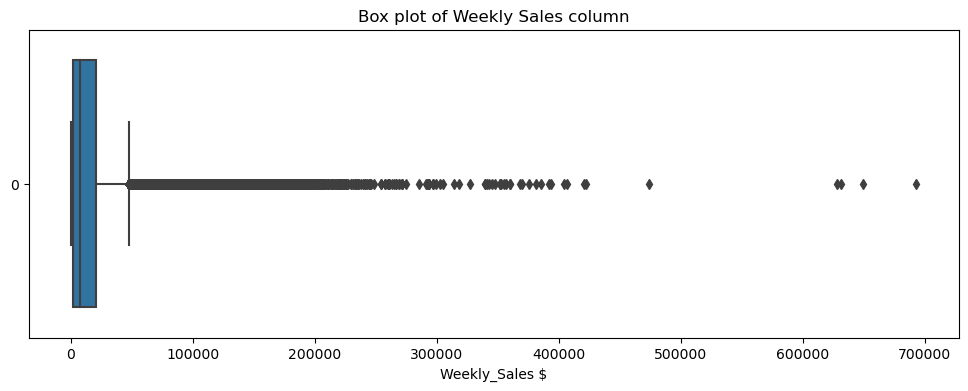

In [53]:
### We tried to analyse the outliers ,we can see that the data has large gaps after 200000
plt.figure(figsize=(12,4))
sns.boxplot(merged_df['Weekly_Sales'], orient='h')
plt.xlabel('Weekly_Sales $')
plt.title('Box plot of Weekly Sales column')
plt.show()

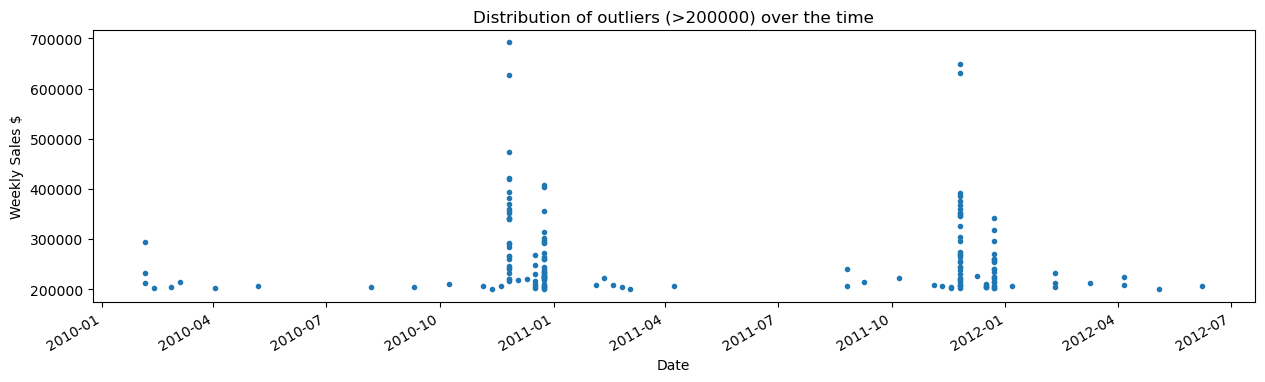

In [54]:
# Here we can observe that throughout the year, we have some positive outliers (where sales more than 200000 $)
merged_df.query('Weekly_Sales > 200000')['Weekly_Sales'].plot(figsize=(15,4), style='.')
plt.ylabel('Weekly Sales $')
plt.title('Distribution of outliers (>200000) over the time')
plt.show()

In [55]:
# Creating a new subest dataframe , which contains important columns that can be analysed further.
subset_df = merged_df[['Store','Dept','Weekly_Sales','Size','Day','Week','Month','Quater','Year']]
subset_df.head()

Store  Dept  Weekly_Sales    Size  Day  Week  Month  Quater  Year
Date                                                                         
2010-02-05      1     1      24924.50  151315    5     6      2       1  2010
2010-02-05      1     2      50605.27  151315    5     6      2       1  2010
2010-02-05      1     3      13740.12  151315    5     6      2       1  2010
2010-02-05      1     4      39954.04  151315    5     6      2       1  2010
2010-02-05      1     5      32229.38  151315    5     6      2       1  2010

### Part 3: Visualization

In [56]:
merged_df.head()

Store  Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
Date                                                                        
2010-02-05      1     1      24924.50      False        42.31       2.572   
2010-02-05      1     2      50605.27      False        42.31       2.572   
2010-02-05      1     3      13740.12      False        42.31       2.572   
2010-02-05      1     4      39954.04      False        42.31       2.572   
2010-02-05      1     5      32229.38      False        42.31       2.572   

            MarkDown1  MarkDown2  MarkDown3  MarkDown4  ...    Size  \
Date                                                    ...           
2010-02-05        0.0        0.0        0.0        0.0  ...  151315   
2010-02-05        0.0        0.0        0.0        0.0  ...  151315   
2010-02-05        0.0        0.0        0.0        0.0  ...  151315   
2010-02-05        0.0        0.0        0.0        0.0  ...  151315   
2010-02-05        0.0        0.0        0.0        0.0  ...  151315   

            Super_Bowl  Labor_Day Thanksgiving  Christmas  Day  Week  Month  \
Date                                                                          
2010-02-05       False      False        False      False    5     6      2   
2010-02-05       False      False        False      False    5     6      2   
2010-02-05       False      False        False      False    5     6      2   
2010-02-05       False      False        False      False    5     6      2   
2010-02-05       False      False        False      False    5     6      2   

            Quater  Year  
Date                      
2010-02-05       1  2010  
2010-02-05       1  2010  
2010-02-05       1  2010  
2010-02-05       1  2010  
2010-02-05       1  2010  

[5 rows x 24 columns]

Observation for Graph 1- Here we have tried to analyze the average weekly sales per year made by all the stores in depth for all three years.Overall, the graph suggests that weekly sales of Walmart stores in the United States are strongly influenced by the time of year. Weekly sales reach at peak in November and December. They are also higher in July and August.
Weekly sales are generally lower in January, February, and March.Hence we can observe there is a seasonal pattern to the weekly sales.However after the 43rd week there are no sales observed in 2010 which is quite strange. For 2011 and 2012 we can see a pattern.In 2010 walmart made the highest sales between weeks 13 and 15.

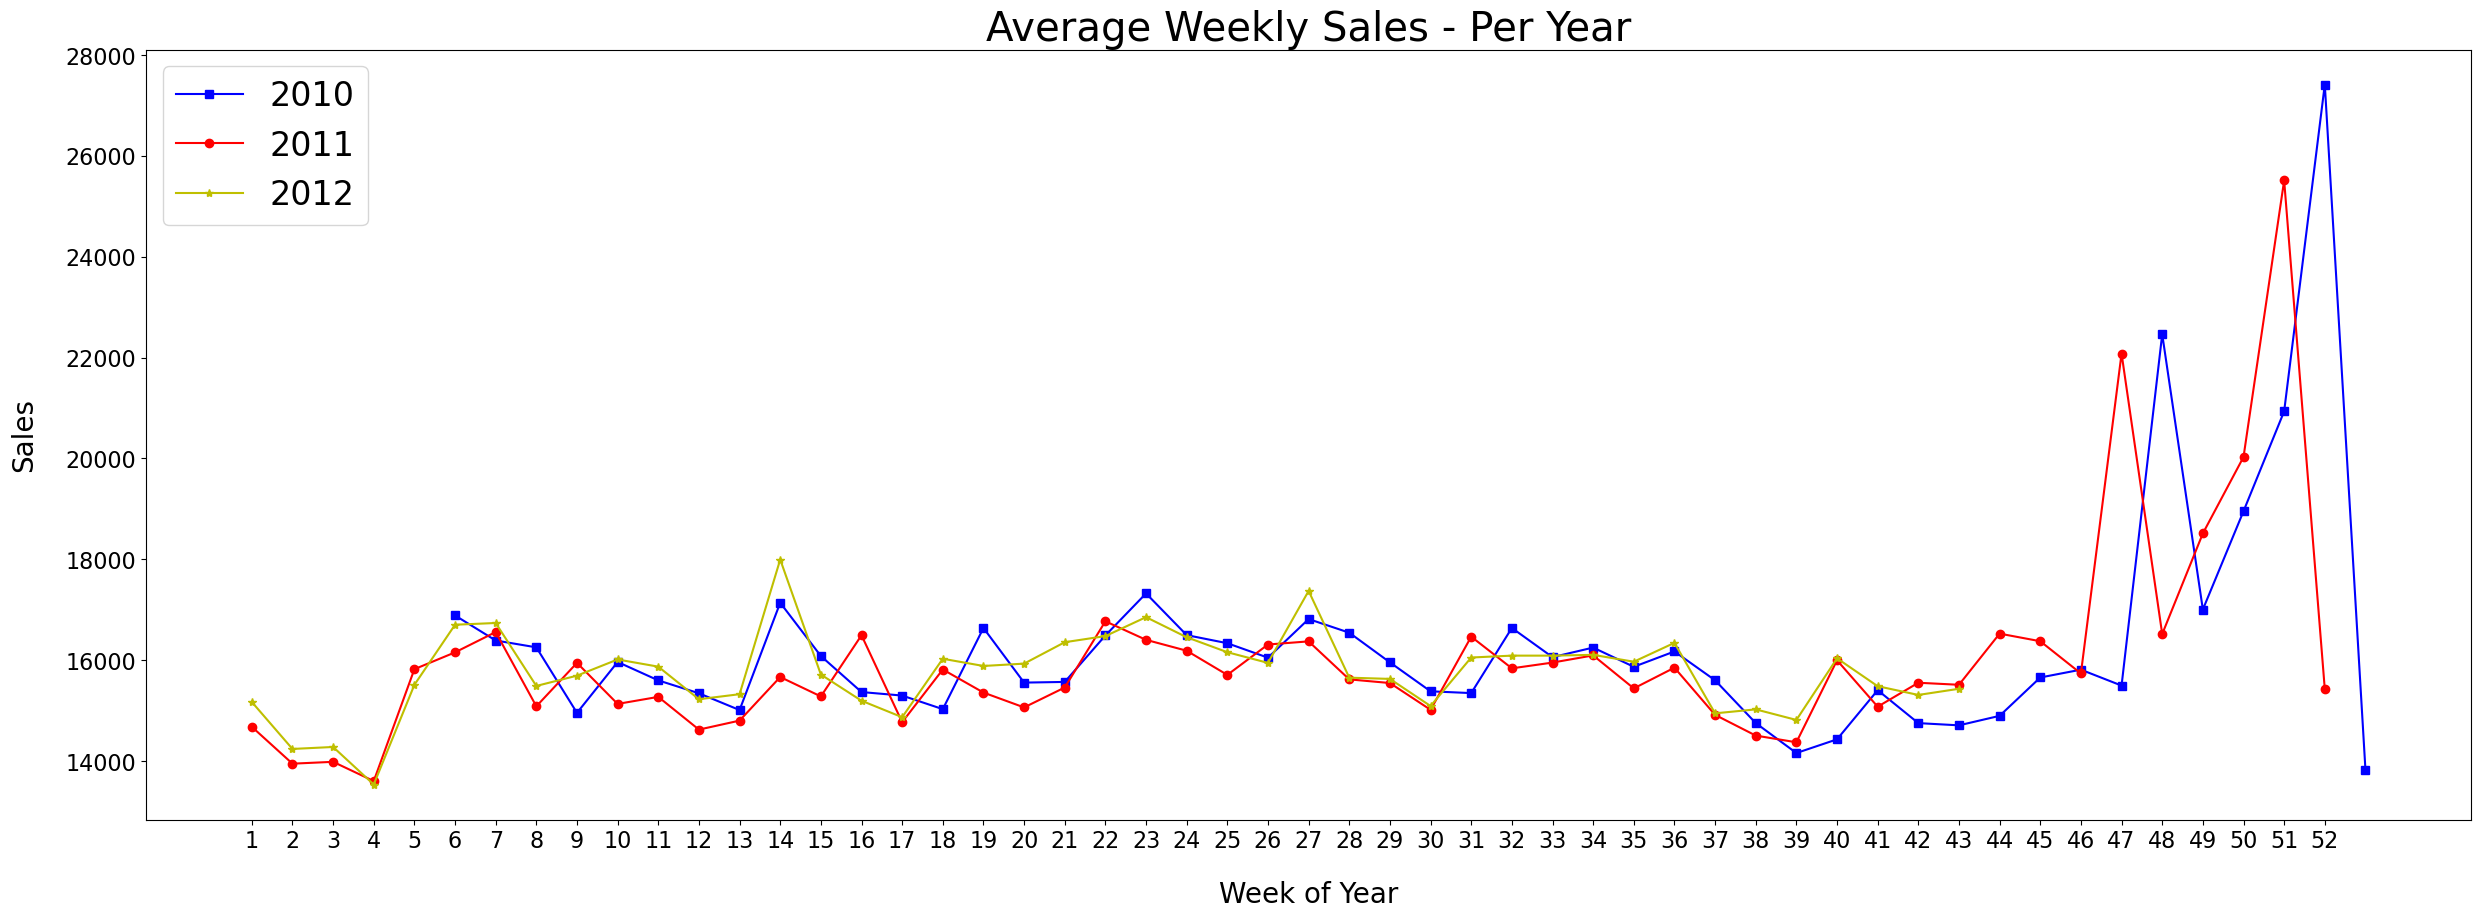

In [57]:
### Graph 1
weekly_sales_2010 = merged_df[merged_df.Year==2010].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2011 = merged_df[merged_df.Year==2011].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2012 = merged_df[merged_df.Year==2012].groupby('Week')['Weekly_Sales'].mean()

plt.figure(figsize=(30,10))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, 's-b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, 'o-r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-y')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales - Per Year", fontsize=29)
plt.legend(['2010', '2011', '2012'], fontsize=24);

Observation for Graph 2 - As we saw in EDA Walmart store has segregatted all the stores into 3 major types(A,B,C) on certain criteria.Here we tried to plot the graph for all three types of the stores and tried to analyse the avergae of weeekly sales for every 5 months Date interval.
We can see that Type A stores made the highest sales as compared to the Types B and C. The reason behind Type A stores making the highest sales can be due to the size,the region where the stores are located to attract more consumers.In addtion we can also observe the pattern that around 2011-01 and 2012-01 walmart made the maximum business.

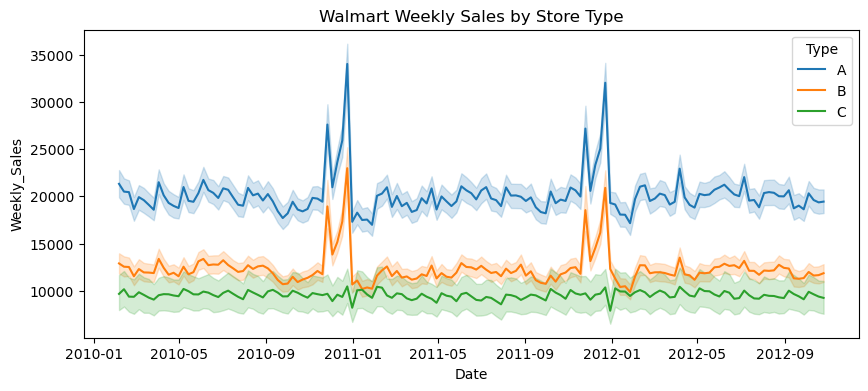

In [58]:
### Graph 2 - Weekly sales by store type
plt.figure(figsize=(10,4))
sns.lineplot(data=merged_df, 
             x='Date',  
             y='Weekly_Sales',
             hue='Type'
            ).set_title('Walmart Weekly Sales by Store Type')

plt.show()

Observation for Graph 3 - Here we tried to analyse the behaviour between all three types of stores Vs the Tempreature for specific date intervals.
From this graph we can assume that the stores are categorized into three types depending on the tempreature in a particular region.
Type A stores are tend to have higher tempreatures as compared to stores B and C. Similarity in the rise of tempreature on certain dates can be found out.

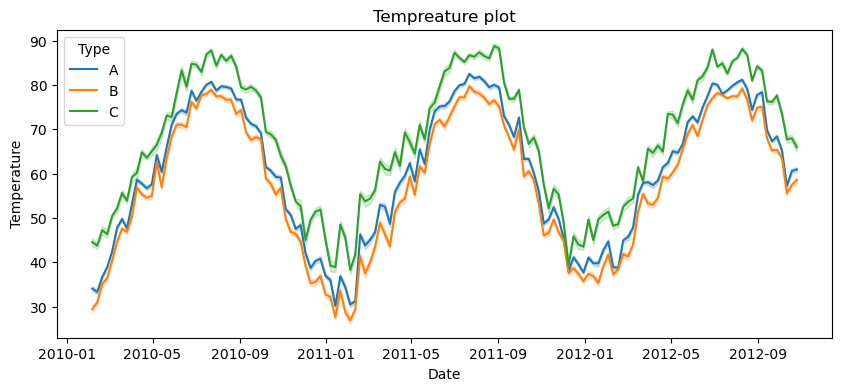

In [59]:
### Graph 3
fig,ax=plt.subplots(figsize=(10,4))
sns.lineplot(data=merged_df,x='Date',y='Temperature',hue='Type',ax=ax).set_title('Tempreature plot')
plt.show()

Observations for Graph 4 - We have then tried to analyse the behaviour for CPI , Fuel_Price and Tempreature for all three years(2010,2011,2012).
1) Consumer Price Index(CPI) - As the CPI is a measure of the price of goods and services that consumers purchase, and it can be used to track inflation we have plotted a CPI behaviour with time for all three years.We can see a positive correlation between the CPI value with respect to the date.CPI value was relatively stable in the first half of 2010, but it began to increase more rapidly in the second half of the year. This trend continued in 2011, and the CPI reached its highest level of the three-year period in December 2011. However, the rate of inflation slowed in 2012, and the CPI ended the year at a level that was slightly lower than its December 2011 peak.
2) Fuel_Price - Similarly , we have tried to analyse the behaviour of fuel_price with respect to the date.The overall trend in the graph is consistent with the fact that fuel prices have been rising in recent years.In 2010 it was about 3.0 however it prices suddenly started to increase after 2011 and were reached the highest around 4.0$/gallon in 2011-05 and 2012-05.
3) Tempreature - We can see almost similar behaviour of the tempreature for all the three years. From months May to October the tempreature was above 70degree Faranhite(greater than 21 degree Celcius) , however in the winter months from November the tempreature started to decline rapidly.

Hence by analysing all the below graphs walmart store can understand the consumer spreading patterns,track overall infaltion,can study the impact on transportation costs and can get an idea about the increased demand for sesonal goods that can boost the sales.

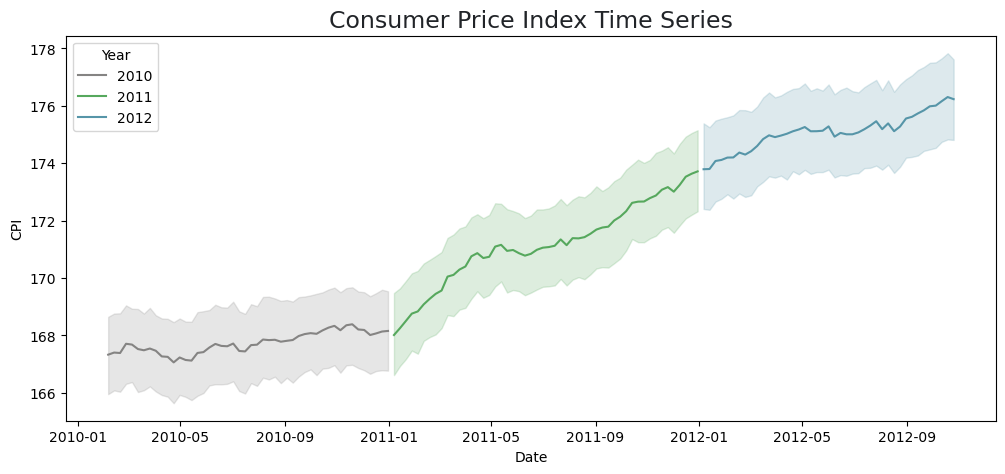

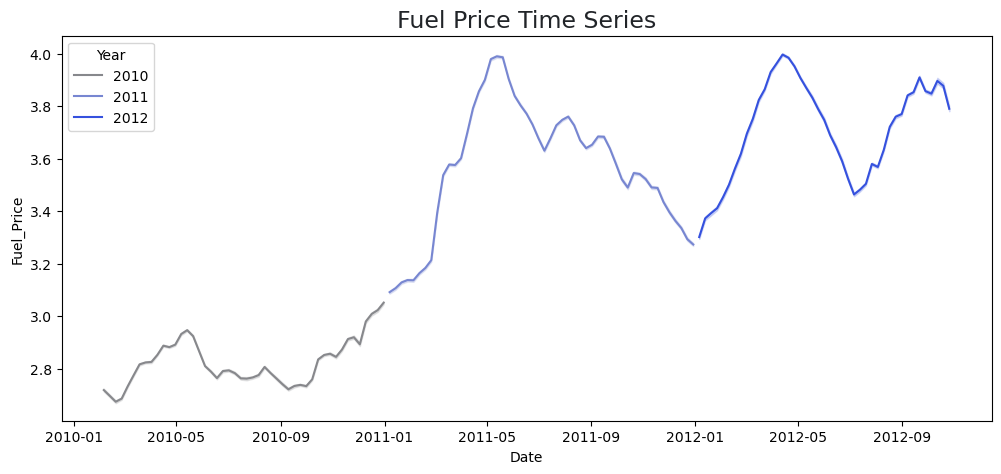

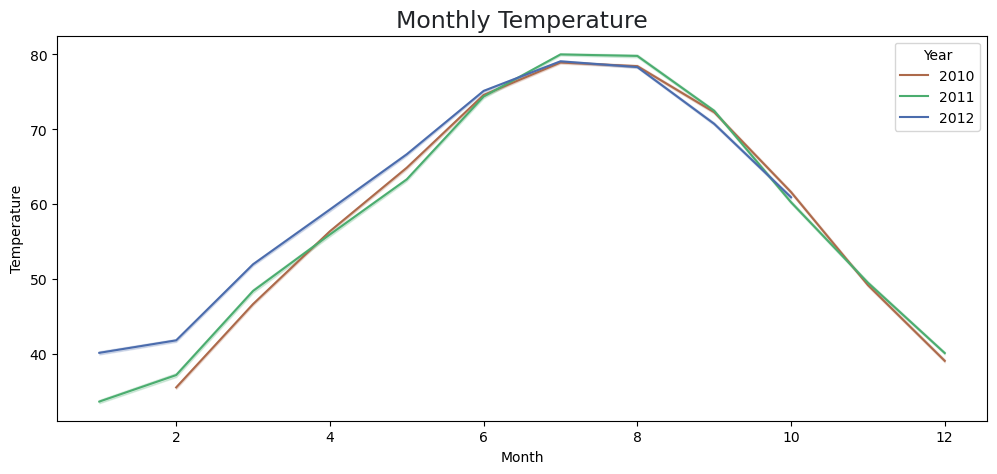

In [60]:
### Graph 4
# Only Colors
c = ['#858483', '#56a85d', '#5695a8']
# Consumer Price Index (CPI)
plt.figure(figsize=(12, 5))#, dpi=500)
sns.lineplot(data=merged_df, x='Date', y='CPI', hue='Year', palette=c)
plt.title('Consumer Price Index Time Series', fontsize=17, color='#212428')
plt.show()

# Gasoline Price (Fuel_Price)
plt.figure(figsize=(12, 5))#, dpi=500)
sns.lineplot(data=merged_df, x='Date', y='Fuel_Price', hue='Year', palette=['#87888c', '#7786d1', '#3551de'])
plt.title('Fuel Price Time Series', fontsize=17, color='#212428')
plt.show()

# Tempreature
plt.figure(figsize=(12, 5))#, dpi=500)
sns.lineplot(data=merged_df, x='Month', y='Temperature', hue='Year', palette=['#ad6a4b', '#4bad6f', '#4b6cad'])
plt.title('Monthly Temperature', fontsize=17, color='#212428')
plt.show()

Observations for Graph 5 - In below bar graph we tried to plot the total sales by quarter from 2010 to 2012. The sales are measured in millions of dollars.The sales for all the quaters seems to be increasing however there is some seasonal variation observed in sales.

Sales are typically higher in the fourth quarter of each year(expect 2012), which includes the holiday season. Sales are also typically higher in the first quarter, which is the beginning of the fiscal year.However the fourth quater of 2012 showed a declined in the sales rate.
Year 2010 made the highest sales around 710 million in the last quater.

In [61]:
#Graph 5
quarter_group = merged_df[["Weekly_Sales", "Year", "Quater"]].groupby(by=["Year", "Quater"]).sum().reset_index()
quarter_group

fig = px.histogram(quarter_group, x="Year", y="Weekly_Sales", color="Quater", height=600, barmode='group', text_auto=".2s", title="Sales by quarter" )
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

Here we have tried to Find the Weekly Sales as per each Holiday and the store Type, which we will further use it for the visuvalization purposes.

In [62]:
merged_df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean().to_frame()

Weekly_Sales
Super_Bowl Type              
False      A     20140.670189
           B     12288.591099
           C      9540.363375
True       A     20666.442664
           B     12427.852372
           C     10190.247946

In [63]:
merged_df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean().to_frame()

Weekly_Sales
Labor_Day Type              
False     A     20151.210941
          B     12294.954138
          C      9542.098293
True      A     20004.267422
          B     12084.304642
          C      9893.459258

In [64]:
merged_df.groupby(['Christmas','Type'])['Weekly_Sales'].mean().to_frame()

Weekly_Sales
Christmas Type              
False     A     20167.193936
          B     12303.056074
          C      9553.534521
True      A     18802.357921
          B     11407.743487
          C      9251.673728

In [65]:
merged_df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean().to_frame()

Weekly_Sales
Thanksgiving Type              
False        A     20148.108162
             B     12290.549297
             C      9549.454168

Observation for Graph 6 - Below bar graph(Graph 6) tries to give an idea about the weekly sales made during the holiday season based on each store type.
The two horizontal lines denote the average values for Holiday and Non-Holiday sales.The red line indicates the average weekly Sales made during the holiday season, while the green line indicates the average weekly sales made during the non-holiday season.We can see that the Walmart makes more business during the holiday seasons.
In addition, we can see that maximum sales are made during the Thanksgiving day for overall stores.
Stores of Type C have less weekly sales as compared to the other two types of the stores. 
However Store A made the highest sales followed by store B and C.

C:\Users\RIDDHI\AppData\Local\Temp\ipykernel_7260\327793027.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



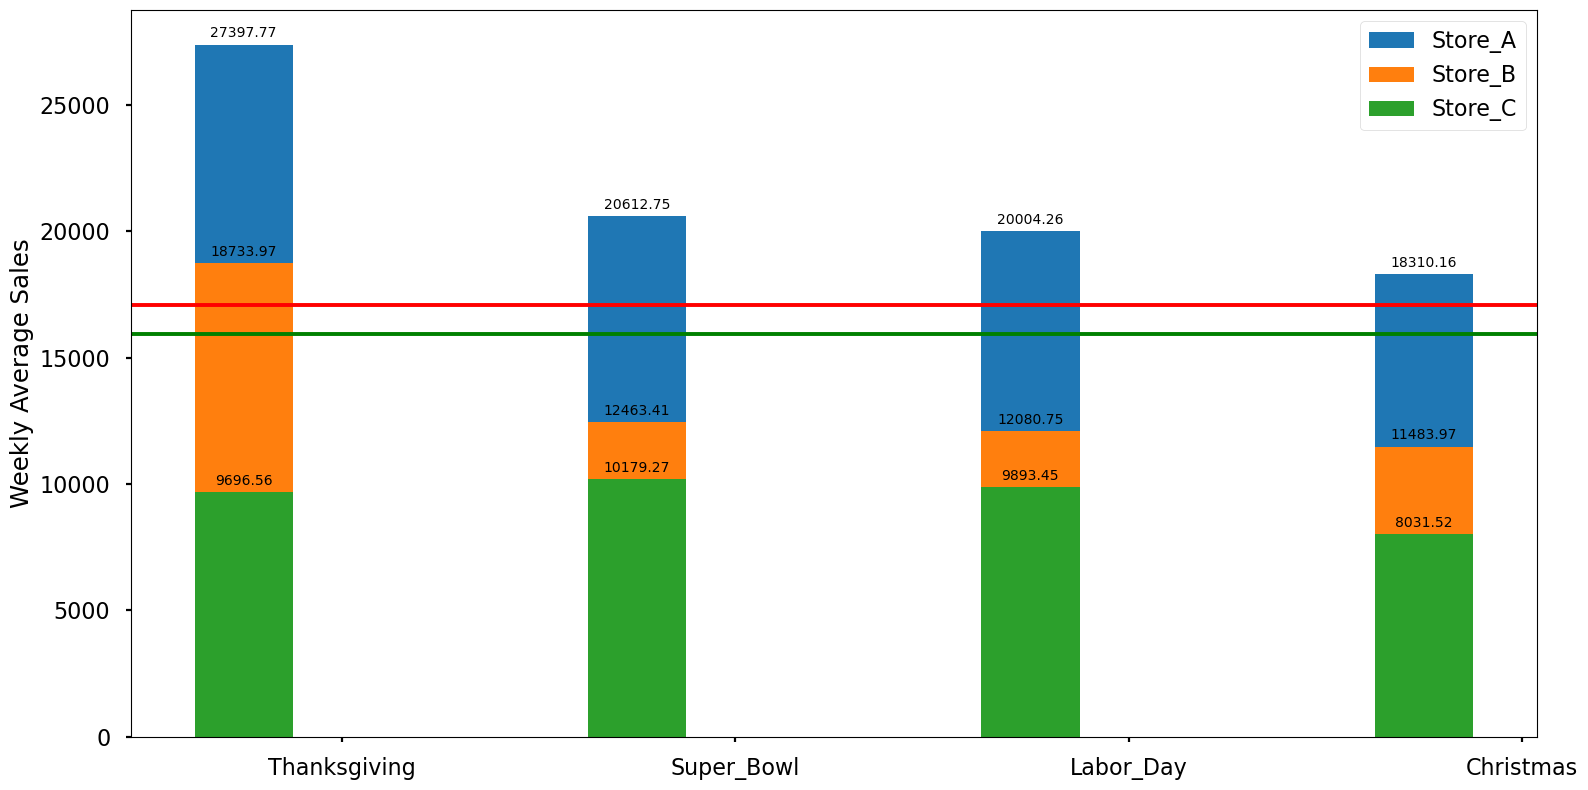

In [66]:
### Graph 6 - Plotting avg weekly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_mean = [27397.77, 20612.75, 20004.26, 18310.16]
B_mean = [18733.97, 12463.41, 12080.75, 11483.97]
C_mean = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))
width = 0.25
fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_mean, width, label='Store_A')
rects2 = ax.bar(x - width, B_mean, width, label='Store_B')
rects3 = ax.bar(x - width, C_mean, width, label='Store_C')
ax.set_ylabel('Weekly Average Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') #Holiday Avg
plt.axhline(y=15952.82,color='green') #Non-Holiday Avg
fig.tight_layout()
plt.show()